## Tools

Tools are needed whenever we want a model to control parts of our code to call external APIs. Most of the LLMs support tool calling. In LangChain we can pass any function to ChatModel.bind_tool().

There are some define tools in langchain. We can also conver any function into tool by assinging @tool decorator to that function.

Let's first look at some tool list.

In [1]:
## Searches wikipedia API
from langchain_community.tools import WikipediaQueryRun
## This wrapper will use Wikipedia API to search and fetch page summaries
from langchain_community.utilities import WikipediaAPIWrapper

#### Wikipedia

In [2]:
## Object of Wikipedia Wrapper with few arguments
wiki_api_wraper=WikipediaAPIWrapper(top_k_results=5,doc_content_chars_max=500)
## Object of WikipediaQueryRunner
wiki_tool = WikipediaQueryRun(api_wrapper=wiki_api_wraper)

In [8]:
## Check the name of the tool
print(wiki_tool.name,"\n")

## Check tool description
print(wiki_tool.description,"\n")

## Check tool arguments
print(wiki_tool.args,'\n')

## Run the tool
print(wiki_tool.run("Virat Kohli"))

wikipedia 

A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historical events, or other subjects. Input should be a search query. 

{'query': {'description': 'query to look up on wikipedia', 'title': 'Query', 'type': 'string'}} 

Page: Virat Kohli
Summary: Virat Kohli (born 5 November 1988) is an Indian international cricketer who plays ODI cricket for the national team and is a former captain in all formats. He is a right-handed batsman and occasional right-arm medium pace bowler. Considered one of the greatest all-format batsmen in the history of cricket, he is called the King, the Chase Master, and the Run Machine for his skills, records and ability to lead his team to victory. Kohli is the highest run-scorer in the I


#### Youtube Search

YouTubeSearchTools uses a form on the Youtube homepage and scrapes the resulting page.

In [15]:
from langchain_community.tools import YouTubeSearchTool

## Object of youtube seacrch tool
youtube_search = YouTubeSearchTool()

## Check tool description
print(youtube_search.description,'\n')

## Check tool arguments
print(youtube_search.args,'\n')

## Run tool
## We can also control the number of results that are returned
print(youtube_search.run('LangGraph:Intro,1'))

search for youtube videos associated with a person. the input to this tool should be a comma separated list, the first part contains a person name and the second a number that is the maximum number of video results to return aka num_results. the second part is optional 

{'query': {'title': 'Query', 'type': 'string'}} 

['https://www.youtube.com/watch?v=5h-JBkySK34&pp=ygUPTGFuZ0dyYXBoOkludHJv']


#### Tavily Search

Tavily is a search engine built for AI agents, delivering real-time, accurate and factual results at speed.

The tool accepts various parameters during instantiation:

- **max_results (optional, int)** : Maximum number of search results to return. Default is 5.

- **topic (optional, str)** : Category of the search. Can be "general", "news", or "finance". Default is "general".

- **include_answer (optional, bool)** : Include an answer to original query in results. Default is False.

- **include_raw_content (optional, bool)** : Include cleaned and parsed HTML of each search result. Default is False.

- **include_images (optional, bool)** : Include a list of query related images in the response. Default is False.

- **include_image_descriptions (optional, bool)** : Include descriptive text for each image. Default is False.

- **search_depth (optional, str)** : Depth of the search, either "basic" or "advanced". Default is "basic".

- **time_range (optional, str)** : The time range back from the current date to filter results - "day", "week", "month", or "year". Default is None.

- **include_domains (optional, List[str])** : List of domains to specifically include. Default is None.

- **exclude_domains (optional, List[str])** : List of domains to specifically exclude. Default is None.


In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults
from dotenv import load_dotenv
load_dotenv()


In [24]:
## Tavily Search Object
tavily_tool = TavilySearchResults(max_results=3, include_raw_content=True)
tavily_tool.invoke("What is latest in Trump vs Elon fued?")

[{'title': 'Elon Musk vs Donald Trump: Full Timeline of Their Feud and Biggest ...',
  'url': 'https://discover.hubpages.com/politics/elon-musk-vs-donald-trump-feud-timeline',
  'content': 'Follow every major moment in the escalating Elon Musk and Donald Trump feud. Updated timeline, key events, and biggest insults between the two billionaires. ... This article is updated daily with the latest developments in the Elon Musk-Donald Trump feud. Bookmark this page to stay up to date. ... symbolizing ongoing political conflict and',
  'score': 0.70847535},
 {'title': 'What is happening between Trump and Elon Musk? See brief timeline',
  'url': 'https://www.statesman.com/story/news/state/2025/06/06/elon-musk-trump-fued-timeline-social-media-beef-twitter-x-truth-social/84068200007/',
  'content': 'A feud between Texas billionaire Elon Musk and President Donald Trump escalated dramatically on June 5, with both men exchanging insults and threats across social media platforms.',
  'score': 0.678

### CustomTool

Convert a user function into a tool

In [26]:
from langchain.agents import tool

In [33]:
## tool decorator will convert a user function into a tool
@tool
def multiply(a:int,b:int)->int:
    """this tool will do multiplication"""
    return a*b

@tool
def add(a:int, b:int) -> int:
    "Add two integers"
    return a+b

## user function multiply is now a langchain tool
print(type(multiply), type(add))

## run tool
print(f"Multiply: {multiply.invoke({'a':10,'b':20})}, Add: {add.invoke({'a':10,'b':20})} ")
## check tool details
print("Name: ",multiply.name)
print("Description: ",multiply.description)
print("Arguments: ",multiply.args)

<class 'langchain_core.tools.structured.StructuredTool'> <class 'langchain_core.tools.structured.StructuredTool'>
Multiply: 200, Add: 30 
Name:  multiply
Description:  this tool will do multiplication
Arguments:  {'a': {'title': 'A', 'type': 'integer'}, 'b': {'title': 'B', 'type': 'integer'}}


In [30]:
@tool
def get_word_length(word: str) -> int:
    " This will return the length of the word"
    return len(word)
## if there is only 1 argument we can directly call the tool as function
get_word_length("Ashutosh Sharma")

C:\Users\ashut\AppData\Local\Temp\ipykernel_30388\1342127395.py:6: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  get_word_length("Ashutosh Sharma")


15

### Let's create a StateGraph with tools.

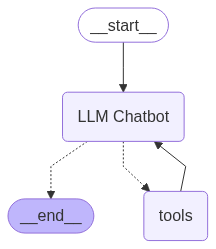

In [62]:
from typing import Annotated, TypedDict
from langchain_core.messages import BaseMessage
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages, AnyMessage
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_openai import ChatOpenAI

## llm
llm = ChatOpenAI(model='o3-mini')

tavily_tool = TavilySearchResults(max_results=3)
tools_list = [tavily_tool, multiply, add]

## Binding tools with llm
llm_with_tool = llm.bind_tools(tools_list)

## defining stateclass
class State(TypedDict):
    messages : Annotated[list[AnyMessage], add_messages]

## ToolNode runs the tools which are called in last AIMessage
## If there are multiple tools called, it will run in parallel
tool_call = ToolNode([tavily_tool, multiply, add])

def llm_chatbot(state: State):
    return {'messages': [llm_with_tool.invoke(state['messages'])]}

## Graph
build = StateGraph(State)
build.add_node('LLM Chatbot', llm_chatbot)
build.add_node('tools',tool_call)
build.add_edge(START,'LLM Chatbot')
build.add_conditional_edges(
    "LLM Chatbot",
    ## it route to the ToolNode if last message has tool calls
    tools_condition,
)
build.add_edge('tools','LLM Chatbot')

app = build.compile()
app


In [65]:
app.invoke({'messages':"Air India ahmedabad plane crash"})

{'messages': [HumanMessage(content='Air India ahmedabad plane crash', additional_kwargs={}, response_metadata={}, id='28a80209-0955-411f-8e6a-af1d36f04e85'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_WA39VexXTwOdKsSbTKCXHnYD', 'function': {'arguments': '{"query": "Air India Ahmedabad plane crash"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 101, 'prompt_tokens': 130, 'total_tokens': 231, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 64, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'o3-mini-2025-01-31', 'system_fingerprint': 'fp_e20469f047', 'id': 'chatcmpl-BhmTDlpuglLVo3hD97b87JtH8MVjf', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--2b6396cd-4d21-4d75-af13-3aa2ab6eca1f-0', tool_calls=[{'name': 'tavily_s

In [56]:
llm_with_tool.invoke('Air India ahmedabad plane crash')

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_7XmEx50cdCrjSSEmN9Nu99jO', 'function': {'arguments': '{"query": "Air India Ahmedabad plane crash"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 165, 'prompt_tokens': 130, 'total_tokens': 295, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 128, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'o3-mini-2025-01-31', 'system_fingerprint': 'fp_e20469f047', 'id': 'chatcmpl-BhmNcDxaJZ8lCvuxpi8X6Pwb43lcl', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--d3f5ff20-12fb-4ba6-a519-301a97ed2b09-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'Air India Ahmedabad plane crash'}, 'id': 'call_7XmEx50cdCrjSSEmN9Nu99jO', 'type': 'tool_call'}], usage_metadata={'input

In [57]:
llm_with_tool.invoke('add 10 and 20 and then multiply the result with 2')

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_81ZZLg6nPKBSBne7ZJiXuTRV', 'function': {'arguments': '{"a": 10, "b": 20}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 291, 'prompt_tokens': 137, 'total_tokens': 428, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 256, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'o3-mini-2025-01-31', 'system_fingerprint': 'fp_e20469f047', 'id': 'chatcmpl-BhmOVZ3FYZoggxss8dqf2T2EKqfFa', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--fadbf29e-5191-4d1a-98ab-f02402edea8d-0', tool_calls=[{'name': 'add', 'args': {'a': 10, 'b': 20}, 'id': 'call_81ZZLg6nPKBSBne7ZJiXuTRV', 'type': 'tool_call'}], usage_metadata={'input_tokens': 137, 'output_tokens': 291, 'total_tokens': 428, 'input_token_details': {'audio': 0, 'cac

In [35]:
tavily_llm = llm.bind_tools([tavily_tool])
res = tavily_llm.invoke("Ahmedabad plane crash")

In [49]:

tavily_tool.invoke(res.tool_calls[0])

ToolMessage(content='[{"title": "Air India Ahmedabad Plane Crash Highlights: At least 265 ... - News18", "url": "https://www.news18.com/india/ahmedabad-plane-crash-air-india-london-flight-carrying-133-passengers-airport-deaths-injuries-liveblog-ws-l-9381884.html", "content": "Ahmedabad Plane Crash: An Air India flight crashed near the Ahmedabad airport on Thursday, with initial inputs suggesting around 142 passengers were onboard.\\n\\nThe incident is believed to have occurred when the flight was taking off for London. Heavy smoke is visible from Dharpur near the Meghaninagar area.\\n\\nThe fire brigade has rushed to the spot, and emergency response teams are being mobilised. Authorities are yet to confirm the cause of the crash.\\n\\nMore details awaited. [...] Share this Article  \\n   WhatsApp\\n   facebook\\n   Twitter\\n   telegram\\n   copy link\\n\\nJun 12, 2025 _19:40 IST_\\n\\nAhmedabad Plane Crash: Air India Flight Carrying 133 Passengers Crashes\\n---------------------------